## Demo các phương pháp chọn số cụm trong Kmean cho khoá luận tốt nghiệp

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score



### Phương pháp Elbow

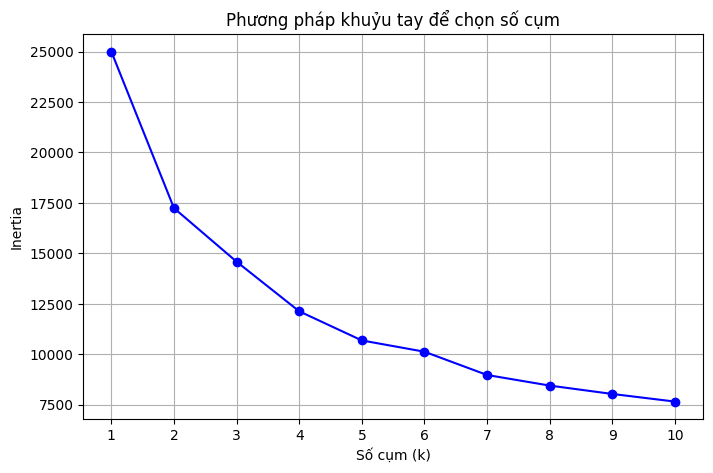

In [4]:
# Đọc lại dữ liệu từ file đã lưu
data_dir = Path("data")
full_path = data_dir / "smart_data_full.csv"
df_full = pd.read_csv(full_path)

# Tách features (bỏ cột quiz_score)
X = df_full.drop(columns=["quiz_score"]).values

# Chuẩn hóa dữ liệu (nên làm khi dùng KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chạy thử nhiều giá trị k để dùng elbow method
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel("Số cụm (k)")
plt.ylabel("Inertia")
plt.title("Phương pháp khuỷu tay để chọn số cụm")
plt.grid(True)
plt.xticks(K_range)
plt.show()

### Phương pháp Silhouette Score

k =  2 → Silhouette = 0.3313
k =  3 → Silhouette = 0.3112
k =  4 → Silhouette = 0.2486
k =  5 → Silhouette = 0.2483
k =  6 → Silhouette = 0.2294
k =  7 → Silhouette = 0.2399
k =  8 → Silhouette = 0.2334
k =  9 → Silhouette = 0.2267
k = 10 → Silhouette = 0.2091

✅ Số cụm tối ưu theo Silhouette Score: k = 2


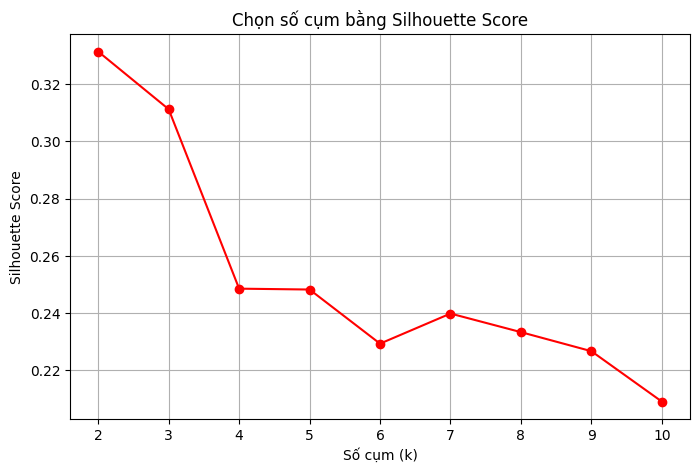

✅ Đã lưu file smart_data_full_with_sil_clusters.csv


In [6]:
# ---------------- Silhouette Score ----------------
silhouette_scores = []
K_range_sil = range(2, 11)      # Silhouette chỉ meaningful khi k ≥ 2

for k in K_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k = {k:2d} → Silhouette = {score:.4f}")

# Chọn k có Silhouette Score cao nhất
best_k = K_range_sil[silhouette_scores.index(max(silhouette_scores))]
print(f"\n✅ Số cụm tối ưu theo Silhouette Score: k = {best_k}")

# (Tuỳ chọn) Vẽ đường cong Silhouette
plt.figure(figsize=(8, 5))
plt.plot(list(K_range_sil), silhouette_scores, 'ro-')
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.title("Chọn số cụm bằng Silhouette Score")
plt.grid(True)
plt.xticks(list(K_range_sil))
plt.show()

# ---------------- Phân cụm với k tốt nhất ----------------
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)

df_full["cluster"] = labels_final
df_full.to_csv(data_dir / "smart_data_full_with_sil_clusters.csv", index=False)
print("✅ Đã lưu file smart_data_full_with_sil_clusters.csv")